## ベイズの考え方
ベイズ推定とは出たデータ（結果）をもとに原因を推定する。

## ベイズ更新

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import numpy as np
import pandas as pd
%matplotlib inline

matplotlibの書体設定

In [31]:
plt.style.use("ggplot")

In [41]:
#事前データ
p_a = 3.0 / 10
p_b = 5.0 / 9.0
p_prior = 0.5

# 0:bule , 1:red
# 0,1によりベルヌーイの二者選択を表している？
data = [0,1,0,0,1,1,1]

In [37]:
#どこまでのデータを使うかというパラメータ
N_data = 6

#尤度関数の設定（尤度関数はlikehoodと呼ばれる）
likehood_a = bernoulli.pmf(data[:N_data],p_a)
likehood_b = bernoulli.pmf(data[:N_data],p_b)

In [38]:
likehood_a

array([0.7, 0.3, 0.7, 0.7, 0.3, 0.3])

In [39]:
likehood_b

array([0.44444444, 0.55555556, 0.44444444, 0.44444444, 0.55555556,
       0.55555556])

([<matplotlib.axis.XTick at 0x7fb910d4c3a0>,
 [Text(0, 0, 'a'), Text(1, 0, 'b')])

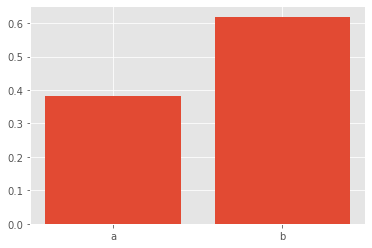

In [40]:
pa_posterior = p_prior
pb_posterior = p_prior

#np.prod 積和
#ここでは尤度分布を求めている
pa_posterior *= np.prod(likehood_a)
pb_posterior *= np.prod(likehood_b)

#規格化したら１になるように設定
norm = pa_posterior + pb_posterior
df = pd.DataFrame([pa_posterior/norm,pb_posterior/norm],columns=["post"])

x = np.arange(df.shape[0])
plt.bar(x,df["post"])
plt.xticks(x,["a","b"])